In [137]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
!pip install statsmodels

In [138]:
import statsmodels.api as sma

In [139]:
df = pd.read_csv('ObesityDataSet.csv')

In [140]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [141]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [142]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [143]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [144]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [145]:
df.shape

(2111, 17)

In [146]:
df['Height'] = df['Height'].apply(lambda x: float(x * 39.37))
df['Height']

0       63.779400
1       59.842400
2       70.866000
3       70.866000
4       70.078600
          ...    
2106    67.351440
2107    68.841752
2108    68.984350
2109    68.482146
2110    68.457973
Name: Height, Length: 2111, dtype: float64

In [147]:
df['Weight'] = df['Weight'].apply(lambda x: float(x * 2.20))
df['Weight']

0       140.800000
1       123.200000
2       169.400000
3       191.400000
4       197.560000
           ...    
2106    289.098762
2107    294.234475
2108    294.116574
2109    293.362610
2110    293.639810
Name: Weight, Length: 2111, dtype: float64

In [148]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,63.7794,140.80,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,59.8424,123.20,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,70.8660,169.40,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,70.8660,191.40,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,70.0786,197.56,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [149]:
for col in df.columns:
    print (f"{col}: \n {df[col].value_counts()}\n")

Gender: 
 Gender
Male      1068
Female    1043
Name: count, dtype: int64

Age: 
 Age
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: count, Length: 1402, dtype: int64

Height: 
 Height
66.929000    60
64.960500    50
62.992000    43
68.897500    39
63.779400    36
             ..
72.556666     1
67.168448     1
67.092031     1
67.157858     1
68.457973     1
Name: count, Length: 1574, dtype: int64

Weight: 
 Weight
176.000000    59
154.000000    43
110.000000    42
165.000000    40
132.000000    37
              ..
143.308898     1
192.015758     1
147.582866     1
198.305096     1
293.639810     1
Name: count, Length: 1525, dtype: int64

family_history_with_overweight: 
 family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

FAVC: 
 FAVC
yes    1866
no      245
Name: count, dtype: int64

FCVC: 
 FCVC
3.000000    652

C:\Users\mercn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


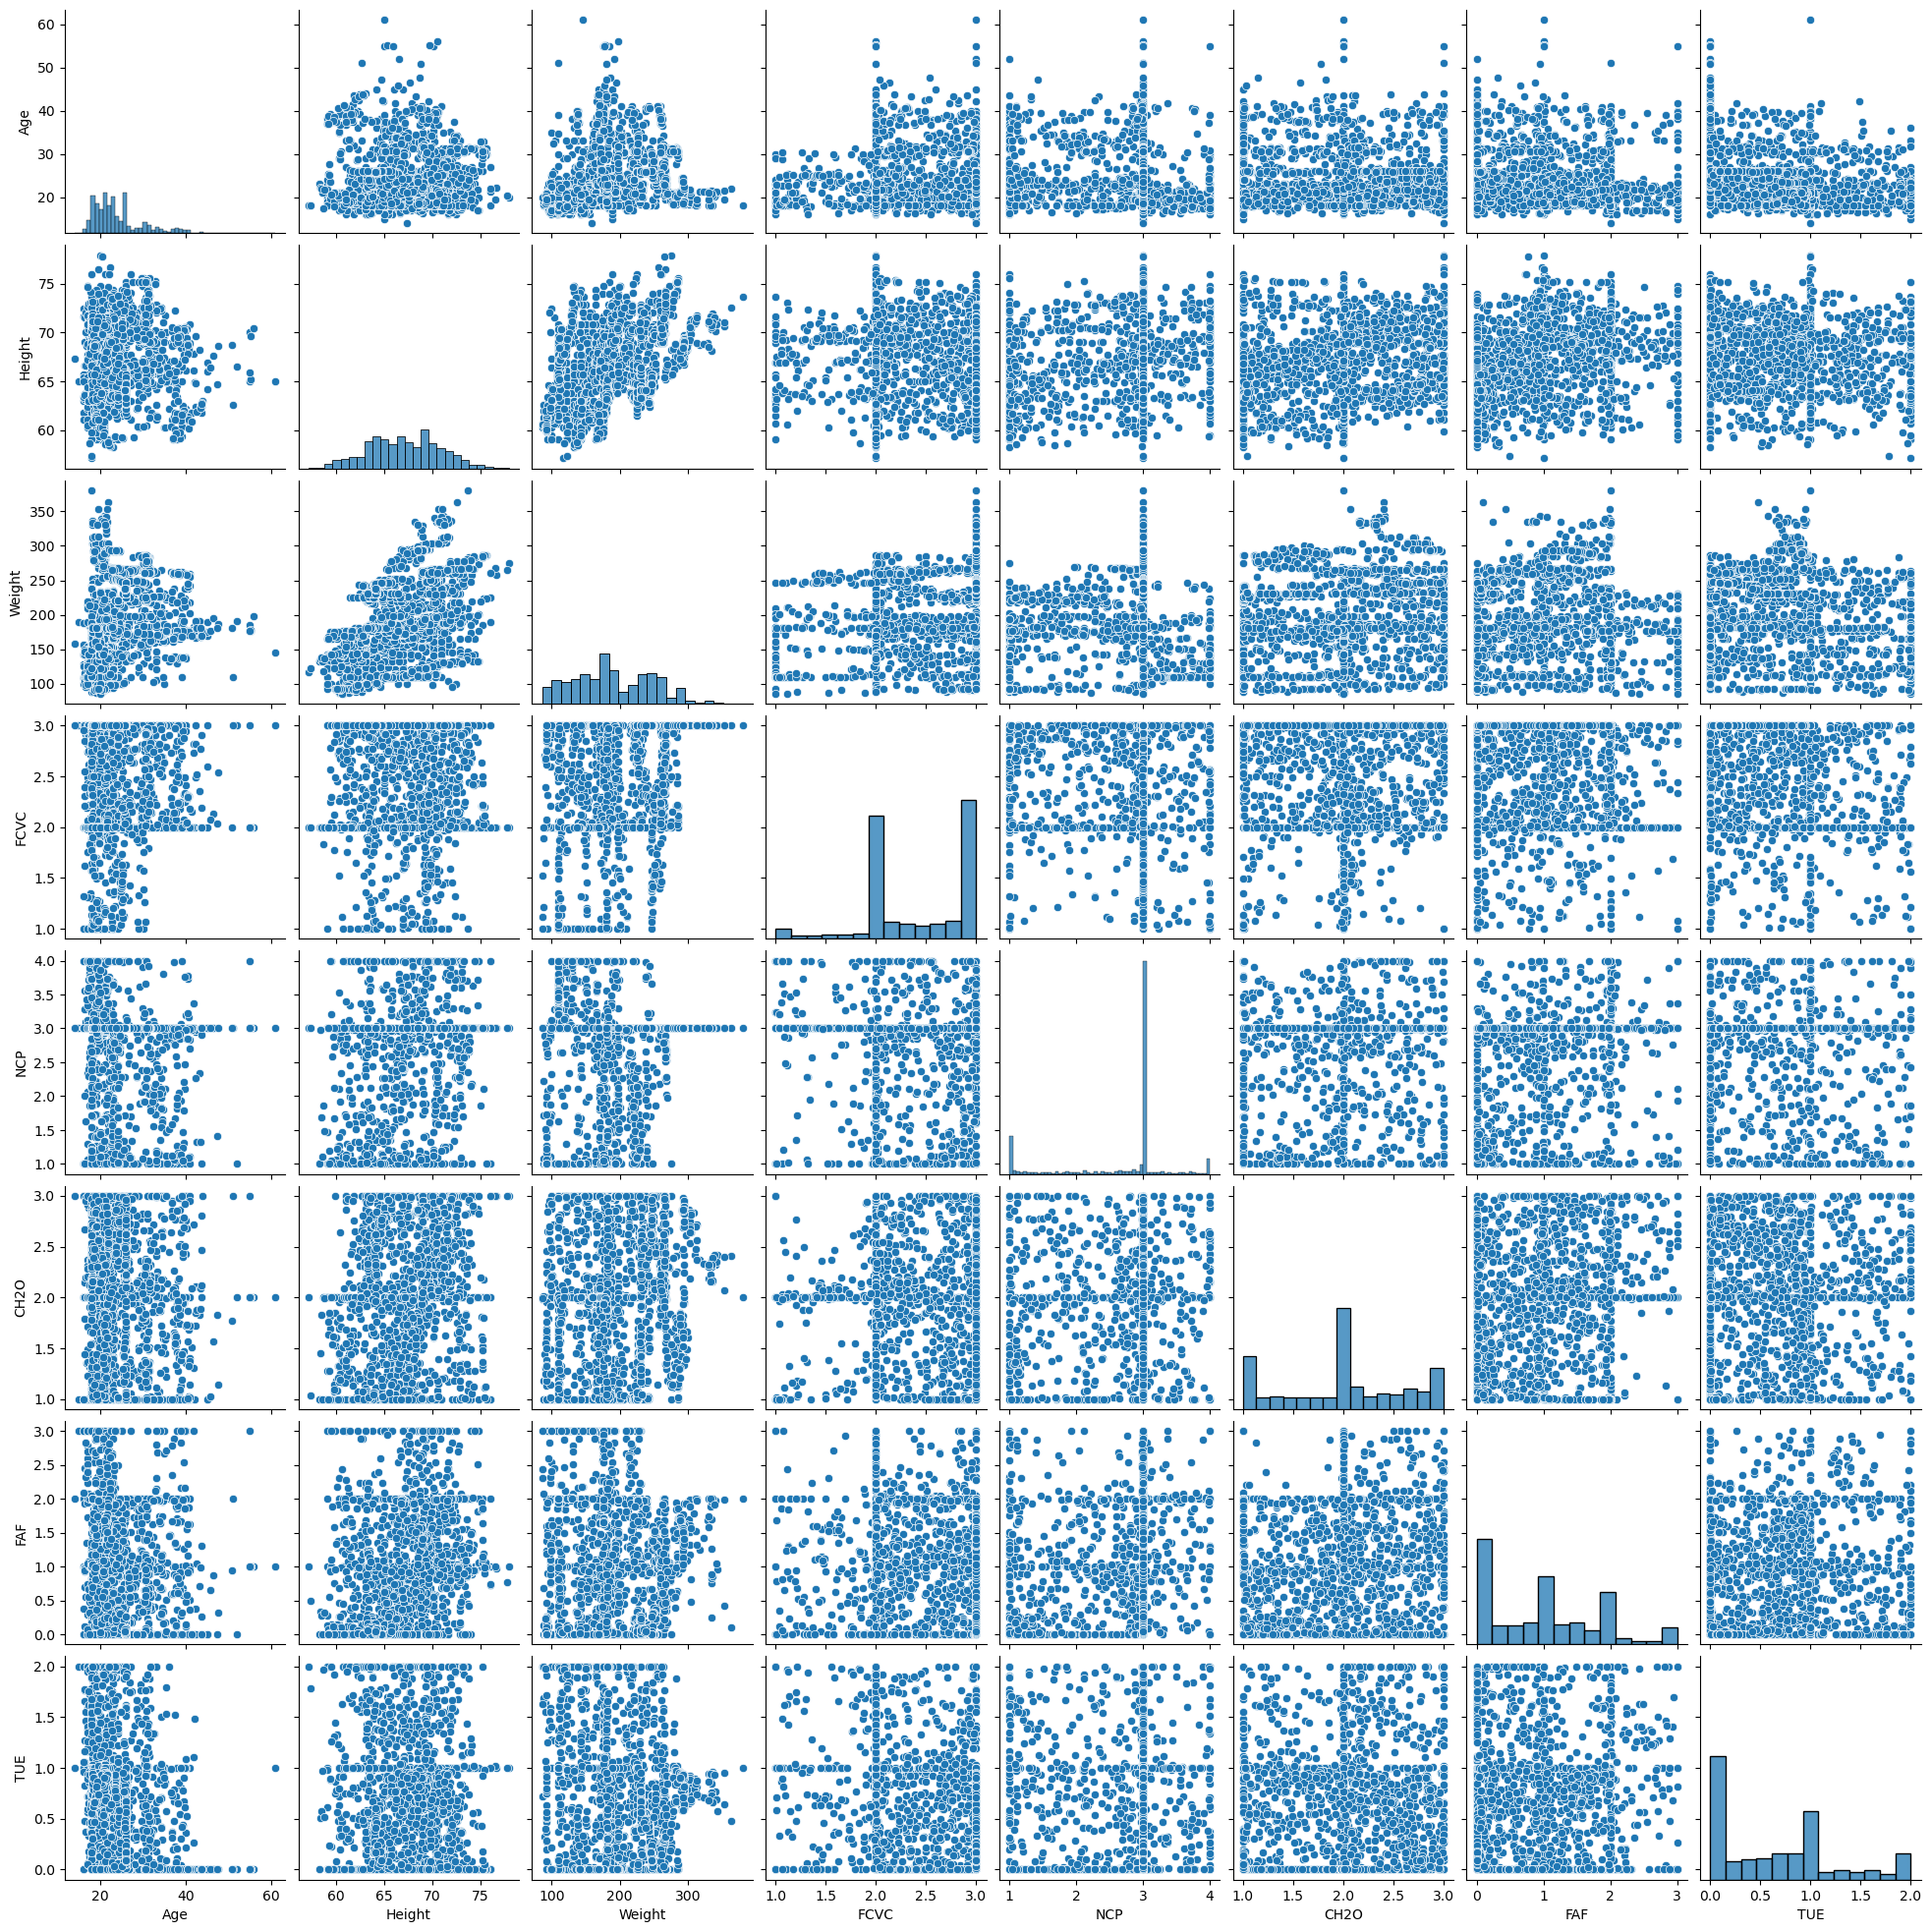

In [150]:
sns.pairplot(data = df)

In [151]:
df.drop(['TUE', 'MTRANS'], axis = 1, inplace = True)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,CALC,NObeyesdad
0,Female,21.0,63.7794,140.80,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,no,Normal_Weight
1,Female,21.0,59.8424,123.20,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,Sometimes,Normal_Weight
2,Male,23.0,70.8660,169.40,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,Frequently,Normal_Weight
3,Male,27.0,70.8660,191.40,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,Frequently,Overweight_Level_I
4,Male,22.0,70.0786,197.56,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,Sometimes,Overweight_Level_II


In [152]:
df = pd.get_dummies(df, columns = ['family_history_with_overweight' , 'Gender' , 'FAVC' , 'FCVC' , 'CAEC' , 'SMOKE' , 'SCC', 'CALC' , 'NObeyesdad'], dtype = float)
df.head()

,Age,Height,Weight,NCP,CH2O,FAF,family_history_with_overweight_no,family_history_with_overweight_yes,Gender_Female,Gender_Male,...,CALC_Frequently,CALC_Sometimes,CALC_no,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,21.0,63.7794,140.80,3.0,2.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,21.0,59.8424,123.20,3.0,3.0,3.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,23.0,70.8660,169.40,3.0,2.0,2.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,27.0,70.8660,191.40,3.0,2.0,2.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,22.0,70.0786,197.56,1.0,2.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [153]:
df.drop(['NObeyesdad_Insufficient_Weight'], axis = 1, inplace = True)
df.head()

,Age,Height,Weight,NCP,CH2O,FAF,family_history_with_overweight_no,family_history_with_overweight_yes,Gender_Female,Gender_Male,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,21.0,63.7794,140.80,3.0,2.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,21.0,59.8424,123.20,3.0,3.0,3.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,23.0,70.8660,169.40,3.0,2.0,2.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,27.0,70.8660,191.40,3.0,2.0,2.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,22.0,70.0786,197.56,1.0,2.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [154]:
X = df.drop(columns = ['Age' , 'Height' , 'Weight'])
y = df['Weight']

In [155]:
from sklearn.feature_selection import SelectKBest, f_regression
fs = SelectKBest(score_func = f_regression , k = 2)
best = fs.fit_transform(X , y)
features = X.columns
best_features = features[fs.get_support()]
print (best_features)

Index(['family_history_with_overweight_yes', 'NObeyesdad_Obesity_Type_III'], dtype='object')


<Axes: xlabel='NObeyesdad_Obesity_Type_III', ylabel='Weight'>

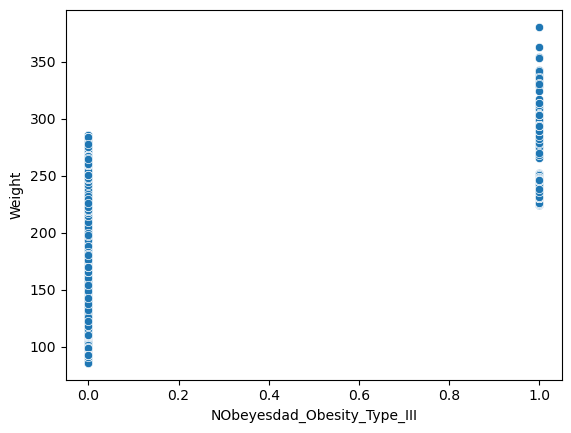

In [156]:
sns.scatterplot(x = 'NObeyesdad_Obesity_Type_III' , y = y , data = df)

In [157]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X[best_features] , y , test_size = .25)

In [158]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr_model = lr.fit(X_train , y_train)

In [159]:
print ("Intercept:" , lr_model.intercept_)
print ("Slope:" , lr_model.coef_[0])

Intercept: 130.16907687526128
Slope: 59.55489887799543


In [160]:
print(lr_model.score(X_test , y_test))

0.4604088337356982


In [161]:
y_pred = lr_model.predict(X_test)

In [162]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test , y_pred)
mse = metrics.mean_squared_error(y_test , y_pred)
rmse = metrics.mean_squared_error(y_test , y_pred , squared = False)

In [163]:
print ("Mae:" , mae)
print ("Mse:" , mse)
print ("Rmse:" , rmse)

Mae: 34.637005342889736
Mse: 1803.4142477804085
Rmse: 42.466625104667884


In [164]:
X2_train = sma.add_constant(X_train)

In [165]:
est = sma.OLS(y_train , X2_train).fit()

In [166]:
from statsmodels.tools.eval_measures import rmse
print (est.summary())
ols_pred = est.predict(sma.add_constant(X_test))
print ("RMSE:" , rmse(y_test , ols_pred))

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     694.7
Date:                Thu, 28 Mar 2024   Prob (F-statistic):          3.43e-217
Time:                        04:25:33   Log-Likelihood:                -8161.6
No. Observations:                1583   AIC:                         1.633e+04
Df Residuals:                    1580   BIC:                         1.635e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

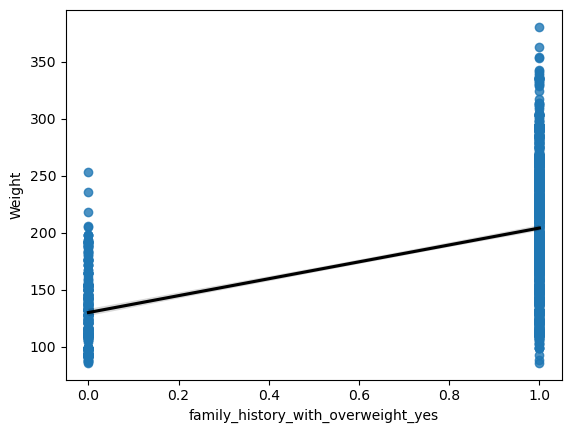

In [167]:
plot_rnet = sns.regplot(data = df , x = 'family_history_with_overweight_yes' , y = 'Weight' , line_kws = {"color": "black" , 'label': '$y=%5.4sx+%5.5s$'%(lr_model.coef_[0] , lr_model.intercept_)})

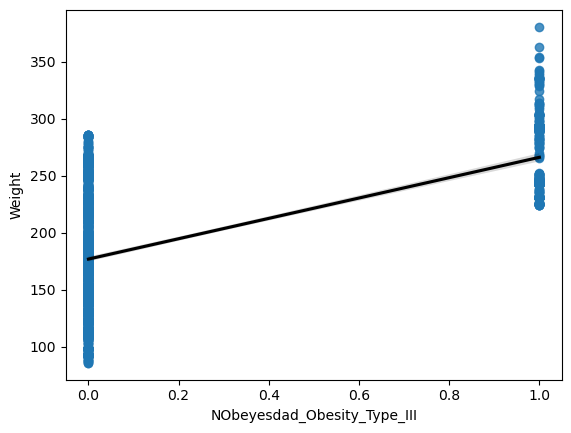

In [168]:
plot_rnet = sns.regplot(data = df , x = 'NObeyesdad_Obesity_Type_III' , y = 'Weight' , line_kws = {"color": "black" , 'label': '$y=%5.4sx+%5.5s$'%(lr_model.coef_[1] , lr_model.intercept_)})

In [169]:
X = df.drop(columns = ['Age' , 'Height' , 'Weight'])
y = df['Age']

In [170]:
from sklearn.feature_selection import SelectKBest, f_regression
fs = SelectKBest(score_func = f_regression , k = 2)
best = fs.fit_transform(X , y)
features = X.columns
best_features = features[fs.get_support()]
print (best_features)

Index(['family_history_with_overweight_yes', 'NObeyesdad_Obesity_Type_II'], dtype='object')


<Axes: xlabel='NObeyesdad_Obesity_Type_II', ylabel='Age'>

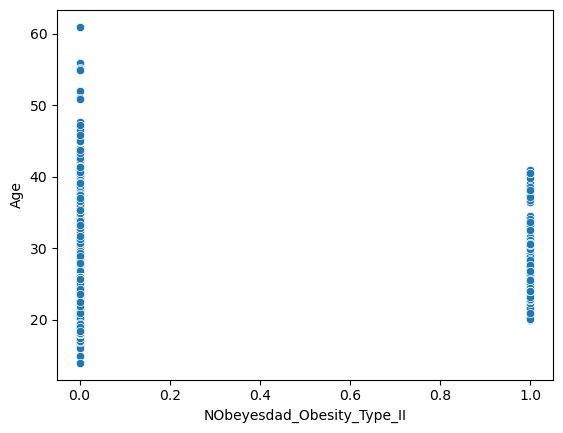

In [171]:
sns.scatterplot(x = 'NObeyesdad_Obesity_Type_II' , y = y , data = df)

In [172]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X[best_features] , y , test_size = .25)

In [173]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr_model = lr.fit(X_train , y_train)

In [174]:
print ("Intercept:" , lr_model.intercept_)
print ("Slope:" , lr_model.coef_[0])

Intercept: 21.527674145441924
Slope: 2.5856023145041256


In [175]:
print(lr_model.score(X_test , y_test))

0.05860557223527174


In [176]:
y_pred = lr_model.predict(X_test)

In [177]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test , y_pred)
mse = metrics.mean_squared_error(y_test , y_pred)
rmse = metrics.mean_squared_error(y_test , y_pred , squared = False)

In [178]:
print ("Mae:" , mae)
print ("Mse:" , mse)
print ("Rmse:" , rmse)

Mae: 4.508482215422642
Mse: 39.517654192956854
Rmse: 6.286306880272141


In [179]:
X3_train = sma.add_constant(X_train)

In [180]:
est = sma.OLS(y_train , X3_train).fit()

In [181]:
from statsmodels.tools.eval_measures import rmse
print (est.summary())
ols_pred = est.predict(sma.add_constant(X_test))
print ("RMSE:" , rmse(y_test , ols_pred))

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     85.81
Date:                Thu, 28 Mar 2024   Prob (F-statistic):           4.18e-36
Time:                        04:25:35   Log-Likelihood:                -5077.5
No. Observations:                1583   AIC:                         1.016e+04
Df Residuals:                    1580   BIC:                         1.018e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

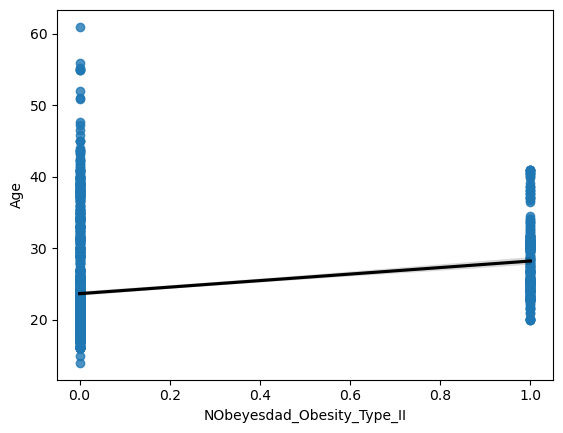

In [182]:
plot_rnet = sns.regplot(data = df , x = 'NObeyesdad_Obesity_Type_II' , y = 'Age' , line_kws = {"color": "black" , 'label': '$y=%5.4sx+%5.5s$'%(lr_model.coef_[1] , lr_model.intercept_)})

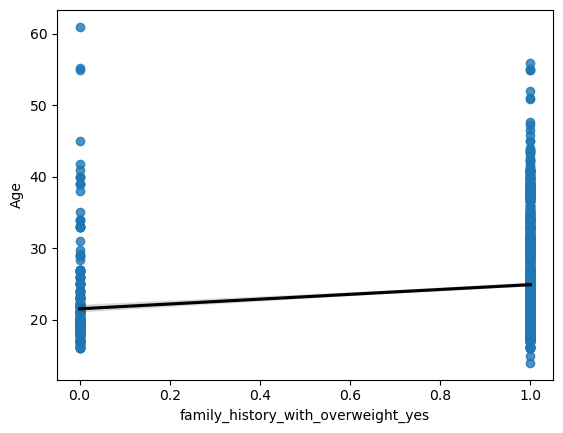

In [183]:
plot_rnet = sns.regplot(data = df , x = 'family_history_with_overweight_yes' , y = 'Age' , line_kws = {"color": "black" , 'label': '$y=%5.4sx+%5.5s$'%(lr_model.coef_[0] , lr_model.intercept_)})

In [184]:
X = df.drop(columns = ['FAF' , 'Weight'])
y = df['Weight']

In [185]:
from sklearn.feature_selection import SelectKBest, f_regression
fs = SelectKBest(score_func = f_regression , k = 2)
best = fs.fit_transform(X , y)
features = X.columns
best_features = features[fs.get_support()]
print (best_features)

Index(['family_history_with_overweight_yes', 'NObeyesdad_Obesity_Type_III'], dtype='object')


<Axes: xlabel='FAF', ylabel='Weight'>

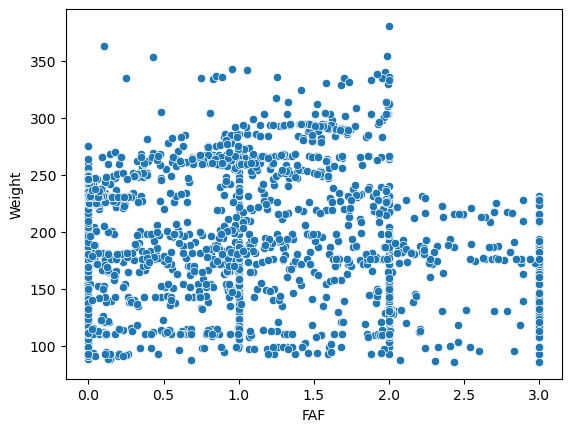

In [186]:
sns.scatterplot(x = 'FAF' , y = y , data = df)

In [187]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = .25)

In [188]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr_model = lr.fit(X_train , y_train)

In [189]:
print ("Intercept:" , lr_model.intercept_)
print ("Slope:" , lr_model.coef_[0])

Intercept: 167734391006.93588
Slope: -0.2903963899606176


In [190]:
print(lr_model.score(X_test , y_test))

-5.041719876928573e+17


In [191]:
y_pred = lr_model.predict(X_test)

In [192]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test , y_pred)
mse = metrics.mean_squared_error(y_test , y_pred)
rmse = metrics.mean_squared_error(y_test , y_pred , squared = False)

In [193]:
print ("Mae:" , mae)
print ("Mse:" , mse)
print ("Rmse:" , rmse)

Mae: 5423923553.294574
Mse: 1.6389992682933143e+21
Rmse: 40484555923.133385


In [194]:
X4_train = sma.add_constant(X_train)

In [195]:
est = sma.OLS(y_train , X4_train).fit()

In [196]:
from statsmodels.tools.eval_measures import rmse
print (est.summary())
ols_pred = est.predict(sma.add_constant(X_test))
print ("RMSE:" , rmse(y_test , ols_pred))

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     50.62
Date:                Thu, 28 Mar 2024   Prob (F-statistic):               0.00
Time:                        04:25:37   Log-Likelihood:                -5892.0
No. Observations:                1583   AIC:                         1.302e+04
Df Residuals:                     965   BIC:                         1.634e+04
Df Model:                         617                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

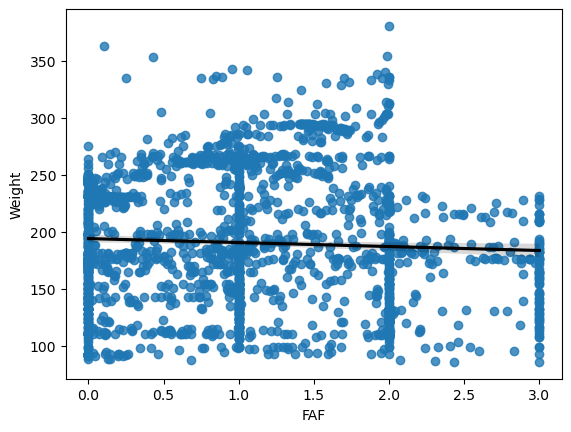

In [197]:
plot_rnet = sns.regplot(data = df , x = 'FAF' , y = 'Weight' , line_kws = {"color": "black" , 'label': '$y=%5.4sx+%5.5s$'%(lr_model.coef_[0] , lr_model.intercept_)})